In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNet
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define paths
base_path = '/kaggle/input/cnn-data/CNN data'
train_path = os.path.join(base_path, 'train')
val_path = os.path.join(base_path, 'val')
test_path = os.path.join(base_path, 'test')

Found 11 classes:
['aircraft', 'artillery', 'camouflage', 'civilian', 'civilian vehicle', 'military_vehicle', 'soldier', 'tank', 'truck', 'warship', 'weapon']


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


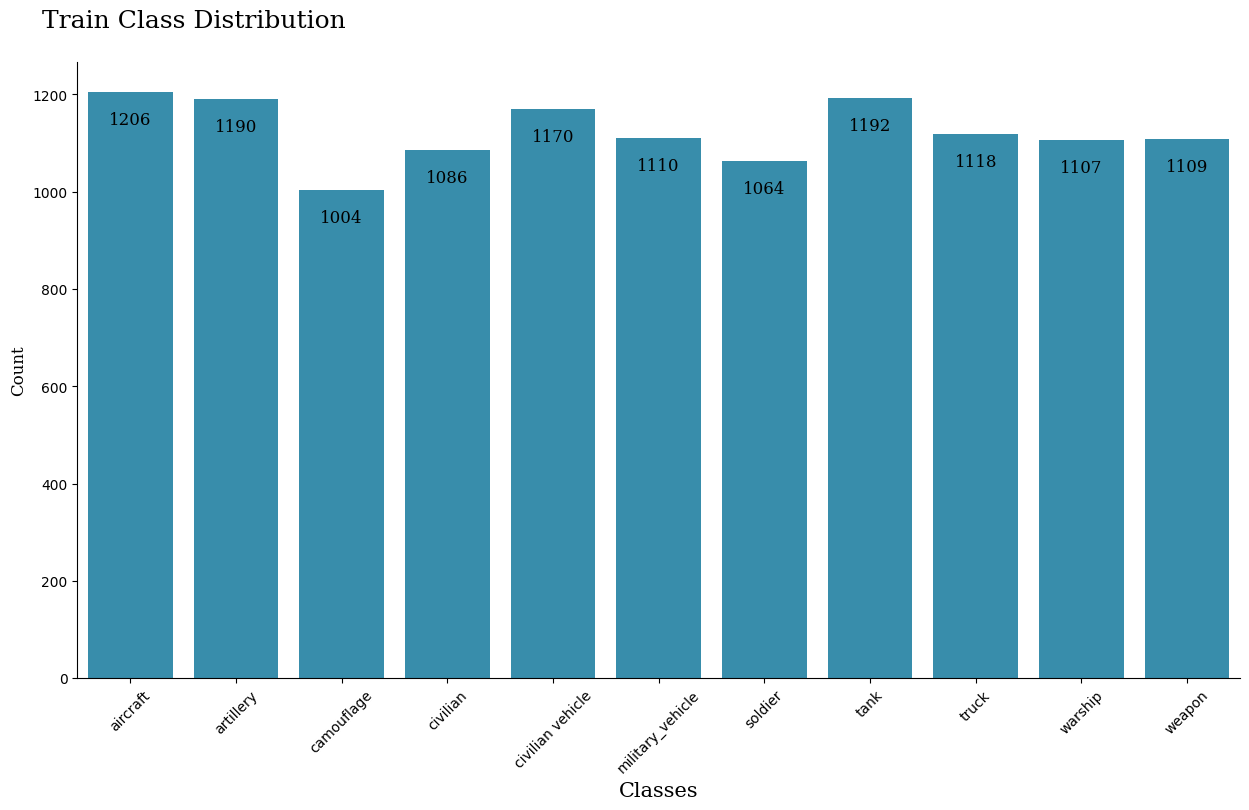

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


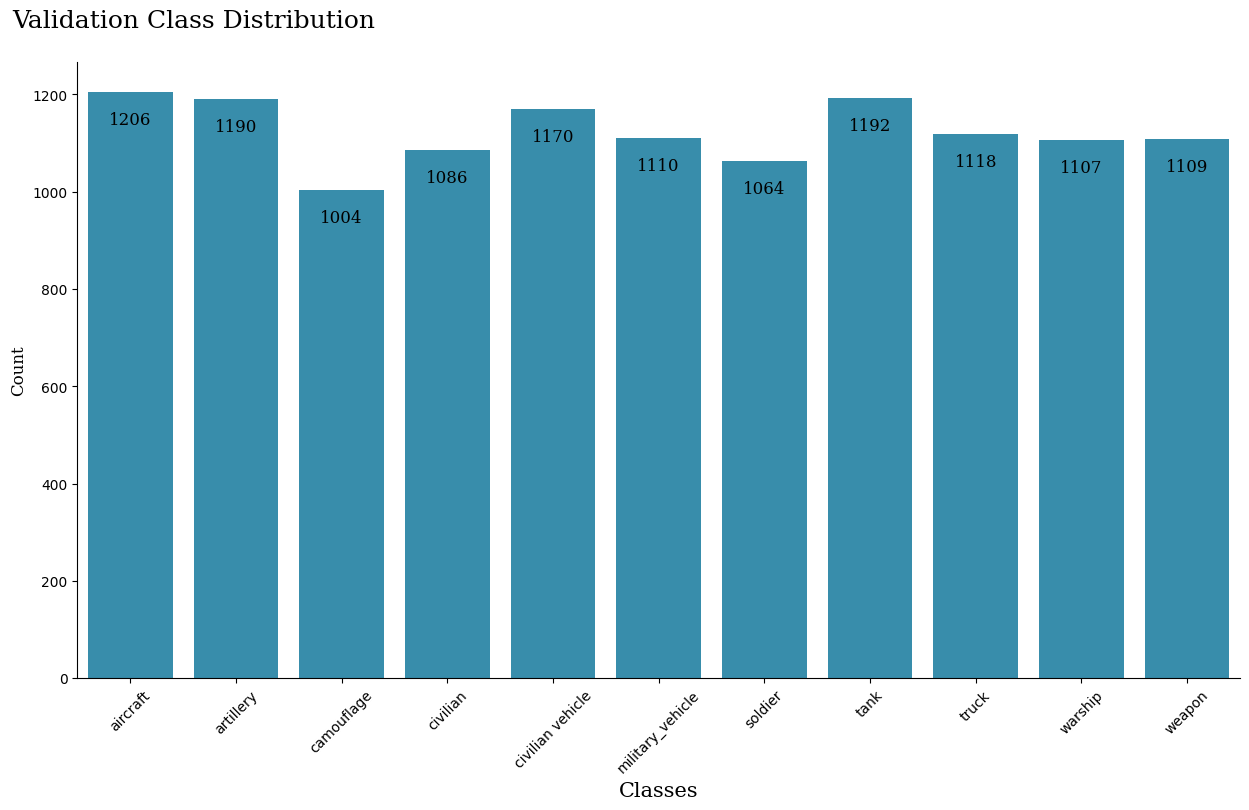

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


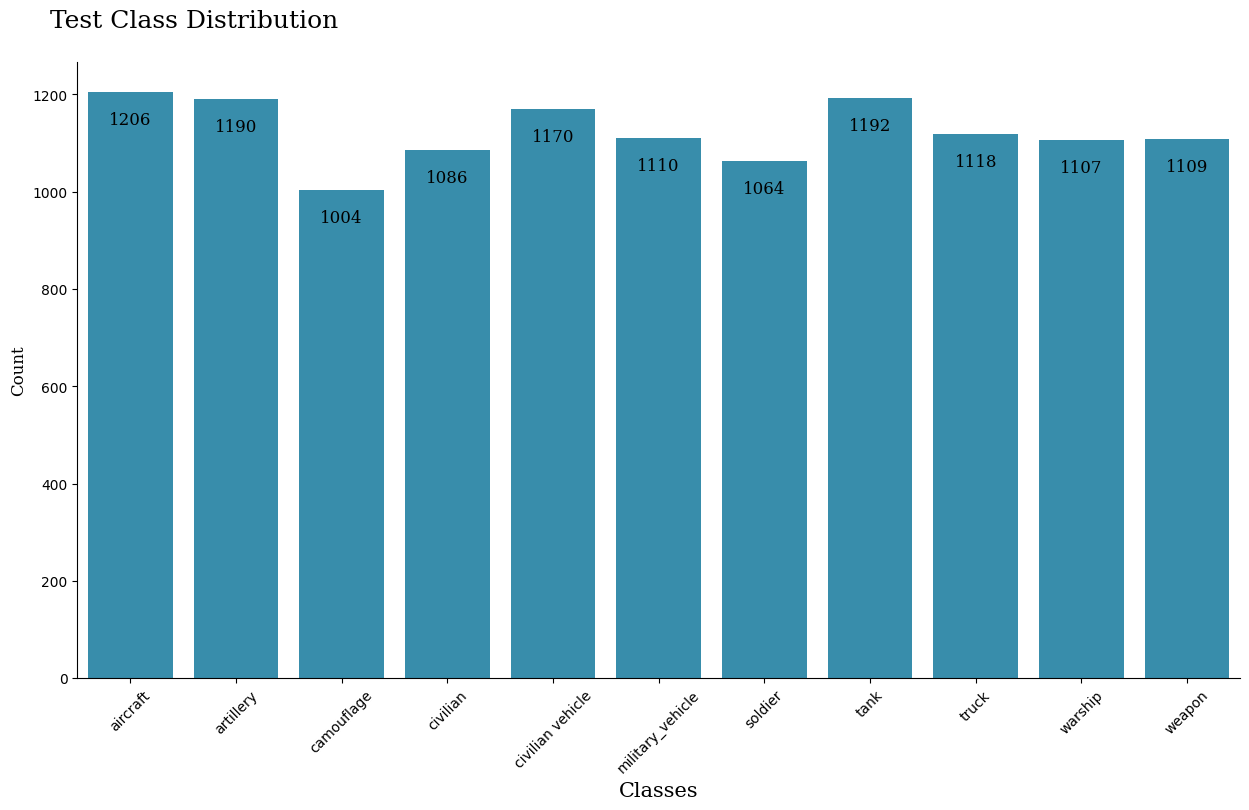

In [18]:

# Get class names from directory structure
class_names = sorted(os.listdir(train_path))
num_classes = len(class_names)

print(f"Found {num_classes} classes:")
print(class_names)

# Visualize class distribution
def plot_class_distribution(path, title):
    class_counts = {}
    for class_name in class_names:
        class_dir = os.path.join(path, class_name)
        class_counts[class_name] = len(os.listdir(class_dir))
    
    plt.figure(figsize=(15, 8))
    plot = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), color='#2596be')
    sns.despine()
    plot.set_title(f'{title}\n', font='serif', x=0.1, y=1, fontsize=18)
    plot.set_ylabel("Count", x=0.02, font='serif', fontsize=12)
    plot.set_xlabel("Classes", fontsize=15, font='serif')
    plt.xticks(rotation=45)
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, -20), font='serif', 
                      textcoords='offset points', size=12)
    plt.show()

plot_class_distribution(train_path, 'Train Class Distribution')
plot_class_distribution(val_path, 'Validation Class Distribution')
plot_class_distribution(test_path, 'Test Class Distribution')


In [16]:

# Define models
def create_custom_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt

# Callbacks
def get_callbacks(model_name):
    return [
        EarlyStopping(monitor='val_accuracy', 
                     patience=5, 
                     restore_best_weights=True, 
                     mode='max'),
        
        ModelCheckpoint(filepath=f'/kaggle/working/best_{model_name}.keras',  # Changed to .keras
                      monitor='val_accuracy', 
                      save_best_only=True, 
                      mode='max'),
        
        ReduceLROnPlateau(monitor='val_loss', 
                         factor=0.5, 
                         patience=5, 
                         min_lr=1e-6, 
                         verbose=1)
    ]
# Function to train and save model
def train_model(model, model_name, epochs=30):  # Increased default epochs
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        validation_data=val_generator,
        validation_steps=val_generator.samples // batch_size,
        epochs=epochs,
        callbacks=get_callbacks(model_name),
        verbose=1
    )
    
# Load best weights and save final model
    best_model = load_model(f'/kaggle/working/best_{model_name}.keras')
    best_model.save(f'/kaggle/working/final_{model_name}.keras')
    
    return best_model, history

# Train all models (using the models dictionary you already created)
trained_models = {}
histories = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    trained_models[name], histories[name] = train_model(model, name, epochs=30)  # Explicitly set epochs
    


Training vgg16...
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
I0000 00:00:1748698573.329841     122 service.cc:148] XLA service 0x7e350c003aa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748698573.330749     122 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748698573.330772     122 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748698573.935278     122 cuda_dnn.cc:5

386/386 ━━━━━━━━━━━━━━━━━━━━ 490s 1s/step - accuracy: 0.1579 - loss: 2.5115 - val_accuracy: 0.2230 - val_loss: 2.0022 - learning_rate: 0.0010
Epoch 2/30
  1/386 ━━━━━━━━━━━━━━━━━━━━ 1:35 247ms/step - accuracy: 0.1562 - loss: 2.1014

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1562 - loss: 2.1014 - val_accuracy: 0.0000e+00 - val_loss: 2.2745 - learning_rate: 0.0010
Epoch 3/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 349s 894ms/step - accuracy: 0.2635 - loss: 1.9464 - val_accuracy: 0.0986 - val_loss: 3.5504 - learning_rate: 0.0010
Epoch 4/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.3750 - loss: 1.6728 - val_accuracy: 0.0000e+00 - val_loss: 3.7394 - learning_rate: 0.0010
Epoch 5/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 364s 930ms/step - accuracy: 0.2818 - loss: 1.8036 - val_accuracy: 0.1146 - val_loss: 16.5732 - learning_rate: 0.0010
Epoch 6/30
  1/386 ━━━━━━━━━━━━━━━━━━━━ 1:37 252ms/step - accuracy: 0.2812 - loss: 1.8193
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 139us/step - accuracy: 0.2812 - loss: 1.8193 - val_accuracy: 0.0000e+00 - val_loss: 20.3762 - learning_rate: 0.0010


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 22 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Training resnet50...
Epoch 1/30
197/386 ━━━━━━━━━━━━━━━━━━━━ 1:52 593ms/step - accuracy: 0.7539 - loss: 0.8801

In [ ]:
# Plot training history
for name, history in histories.items():
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} Accuracy', font='serif', fontsize=12)
    plt.xlabel('Epoch', font='serif')
    plt.ylabel('Accuracy', font='serif')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{name} Loss', font='serif', fontsize=12)
    plt.xlabel('Epoch', font='serif')
    plt.ylabel('Loss', font='serif')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'/kaggle/working/{name}_training_plots.png', dpi=300)
    plt.show()

# Print best validation accuracy for each model
for name, history in histories.items():
    best_val_acc = max(history.history['val_accuracy'])
    print(f"Best validation accuracy for {name}: {best_val_acc:.4f}")

In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns
import numpy as np
import pandas as pd

# Evaluate models (as provided in the previous message)
class_labels = [
    'camouflage_soldier',
    'weapon',
    'military_tank',
    'military_truck',
    'military_vehicle',
    'civilian',
    'soldier',
    'civilian_vehicle',
    'military_artillery',
    'military_aircraft',
    'military_warship'
]

def top_k_accuracy(y_true, y_pred_probs, k=2):
    top_k_preds = np.argsort(y_pred_probs, axis=1)[:, -k:]
    return np.mean([y_true[i] in top_k_preds[i] for i in range(len(y_true))])

def compute_metrics_from_cm(cm, class_labels):
    n_classes = len(class_labels)
    precision_per_class = np.zeros(n_classes)
    recall_per_class = np.zeros(n_classes)
    f1_per_class = np.zeros(n_classes)
    support = cm.sum(axis=1)
    for i in range(n_classes):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        precision_per_class[i] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall_per_class[i] = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_per_class[i] = 2 * precision_per_class[i] * recall_per_class[i] / (precision_per_class[i] + recall_per_class[i]) if (precision_per_class[i] + recall_per_class[i]) > 0 else 0
    total_support = support.sum()
    precision_weighted = np.sum(precision_per_class * support) / total_support if total_support > 0 else 0
    recall_weighted = np.sum(recall_per_class * support) / total_support if total_support > 0 else 0
    f1_weighted = np.sum(f1_per_class * support) / total_support if total_support > 0 else 0
    return precision_per_class, recall_per_class, f1_per_class, support, precision_weighted, recall_weighted, f1_weighted

def evaluate_model(model, generator, model_name, class_labels):
    y_pred_probs = model.predict(generator)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = generator.classes
    
    accuracy = accuracy_score(y_true, y_pred)
    top2_accuracy = top_k_accuracy(y_true, y_pred_probs, k=2)
    cm = confusion_matrix(y_true, y_pred)
    precision_per_class, recall_per_class, f1_per_class, support, precision_weighted, recall_weighted, f1_weighted = compute_metrics_from_cm(cm, class_labels)
    kappa = cohen_kappa_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Top-2 Accuracy: {top2_accuracy:.4f}")
    print(f"Weighted Precision: {precision_weighted:.4f}")
    print(f"Weighted Recall: {recall_weighted:.4f}")
    print(f"Weighted F1-Score: {f1_weighted:.4f}")
    print(f"Cohen's Kappa: {kappa:.4f}")
    
    print("\nPer-Class Metrics:")
    for i, cls in enumerate(class_labels):
        print(f"{cls}:")
        print(f"  Precision: {precision_per_class[i]:.4f}")
        print(f"  Recall: {recall_per_class[i]:.4f}")
        print(f"  F1-Score: {f1_per_class[i]:.4f}")
        print(f"  Support: {support[i]}")
    
    # Confusion Matrix Visualization
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'{model_name} Confusion Matrix', font='serif', fontsize=14)
    plt.ylabel('True Label', font='serif')
    plt.xlabel('Predicted Label', font='serif')
    plt.savefig(f'/kaggle/working/{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Confusion Matrix saved as {model_name}_confusion_matrix.png in /kaggle/working/")
    
    # ROC Curves
    y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))
    plt.figure(figsize=(10, 8))
    for i in range(len(class_labels)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', font='serif')
    plt.ylabel('True Positive Rate', font='serif')
    plt.title(f'{model_name} ROC Curves', font='serif', fontsize=14)
    plt.legend(loc="lower right")
    plt.savefig(f'/kaggle/working/{model_name}_roc_curves.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"ROC Curves saved as {model_name}_roc_curves.png in /kaggle/working/")
    
    return {
        'accuracy': accuracy,
        'top2_accuracy': top2_accuracy,
        'precision': precision_weighted,
        'recall': recall_weighted,
        'f1': f1_weighted,
        'kappa': kappa,
        'cm': cm
    }

# Evaluate all models on validation set
print("\nEvaluating models on validation set...")
results = {}
for name, model in trained_models.items():
    results[name] = evaluate_model(model, val_generator, name, class_labels)

# Summary table
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'Top-2 Accuracy': [results[name]['top2_accuracy'] for name in results],
    'Precision': [results[name]['precision'] for name in results],
    'Recall': [results[name]['recall'] for name in results],
    'F1-Score': [results[name]['f1'] for name in results],
    'Cohen\'s Kappa': [results[name]['kappa'] for name in results]
})

print("\nSummary of Model Performance:")
print(results_df)
results_df.to_csv('/kaggle/working/model_performance_summary.csv', index=False)
print("Summary saved to /kaggle/working/model_performance_summary.csv")

# Evaluate on test set
print("\nEvaluating models on test set...")
test_results = {}
for name, model in trained_models.items():
    test_results[name] = evaluate_model(model, test_generator, f"{name}_test", class_labels)